In [ ]:
import pandas as pd
import numpy as np

# Генерация данных

In [ ]:
#создание датафрейма
Data = pd.DataFrame(columns = ['len_text', 'friends', 'views'])
#фиксирование генератора
np.random.seed(42)
#генерация данных для каждой колонки
Data['len_text'] = list(np.random.randint(5, 100, 200))
Data['friends'] = list(np.random.randint(0, 1000, 200))
#Data['views'] = 5*np.array(Data['friends']) + np.random.randint(0, 100)
Data['views'] = [5*i + np.random.randint(0, 300) for i in np.array(Data['friends'])]
Data['sentiment'] = list(np.random.randint(0, 2, 200))
Data

,len_text,friends,views,sentiment
0,56,826,4164,1
1,97,373,2056,1
2,19,671,3403,0
3,76,607,3051,0
4,65,471,2526,0
...,...,...,...,...
195,41,452,2343,1
196,55,828,4356,1
197,48,815,4261,0
198,28,658,3308,0


# Визуализация

Визуализация наглядно показывает тренды, паттерны и выбросы, которые тяжело увидеть в числах

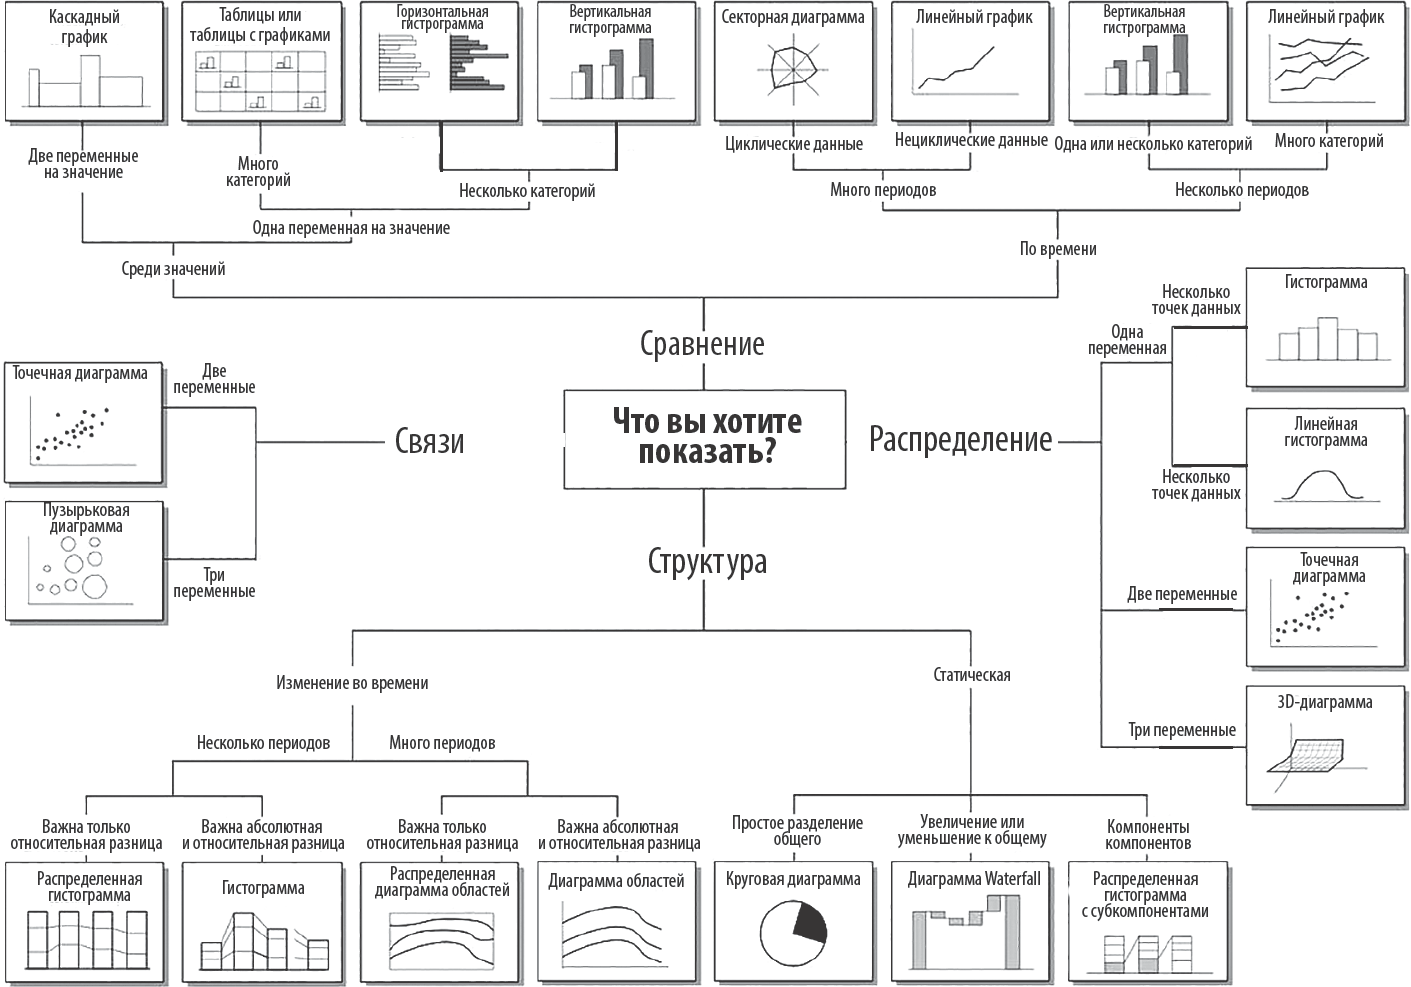

## Библиотеки

1.   ***Matplotlib*** - для визуализации данных двумерной и трехмерной графикой https://matplotlib.org/stable/
2.   ***Seaborn*** - для создания статистических графиков, основывается на matplotlib и абстрагирует его сложность https://seaborn.pydata.org/
3. ***Plotly*** - интерактивная визуализация данных https://plotly.com/python/



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Линейная диаграмма

**Линейная диаграмма** – это тип диаграммы, которая отображает информацию в виде ряда точек данных, называемых "маркерами", соединенных отрезками прямых линий. Лучше использовать, когда одна переменная сильно варьируется от другой.

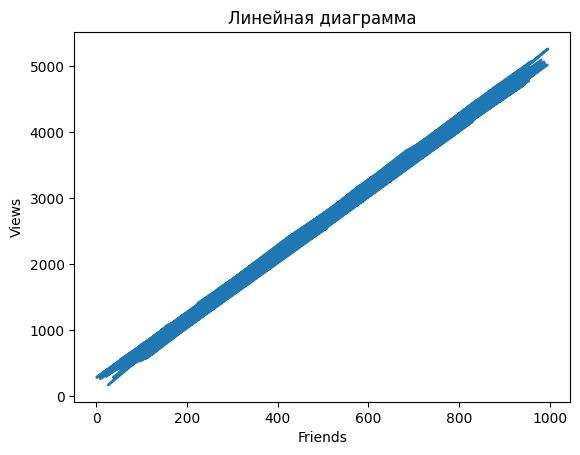

In [ ]:
#matplotlib
x = Data['friends']
y = Data['views']

'''
Data_sort = Data.sort_values('friends')
x = Data_sort['friends']
y = Data_sort['views']
'''
fig, ax = plt.subplots()
ax.plot(x, y, linestyle = 'solid')
plt.xlabel("Friends")
plt.ylabel("Views")
plt.title('Линейная диаграмма');

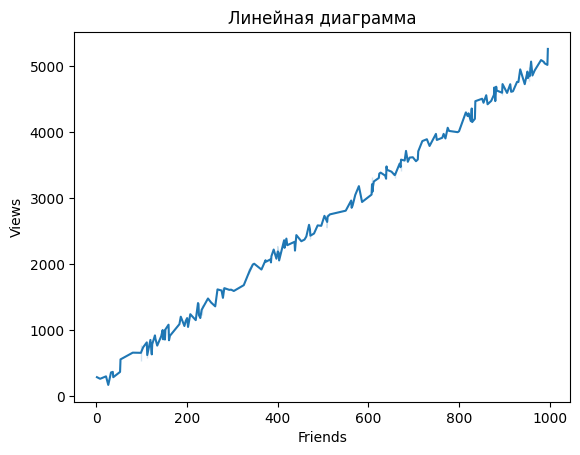

In [ ]:
#seaborn
x = Data['friends']
y = Data['views']

sns.lineplot(x = x, y = y)

plt.xlabel("Friends")
plt.ylabel("Views")
plt.title('Линейная диаграмма');

In [ ]:
#plotly
'''
x = Data['friends']
y = Data['views']
'''

Data_sort = Data.sort_values('friends')
x = Data_sort['friends']
y = Data_sort['views']

fig = px.line(x=x, y=y, title='Линейная диаграмма').update_layout(
    xaxis_title="Friends", yaxis_title="Views")
fig.show()

## Диаграмма рассеивания

**Диаграмма рассеивания** - это графическое представление пар исследуемых данных в виде множества точек на координатной плоскости. Данная диаграмма дает возможность выдвинуть гипотезу о наличии или отсутствии корреляционной связи между двумя случайными величинами

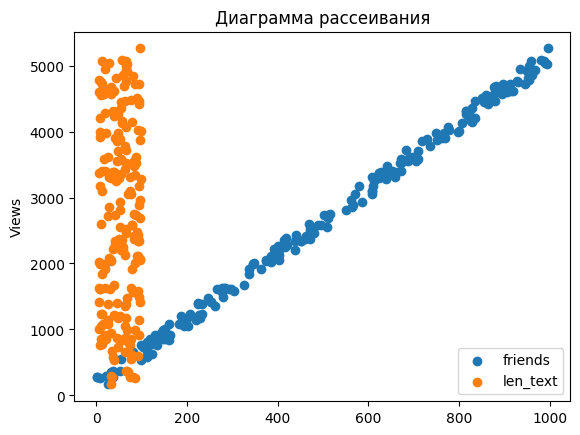

In [ ]:
#matplotlib
x1 = Data['friends']
x2 = Data['len_text']
y = Data['views']

fig, ax = plt.subplots()
plt.scatter(x1, y, label = 'friends')
plt.scatter(x2, y, label = 'len_text')

plt.legend()
plt.ylabel("Views")
plt.title('Диаграмма рассеивания')
plt.show();

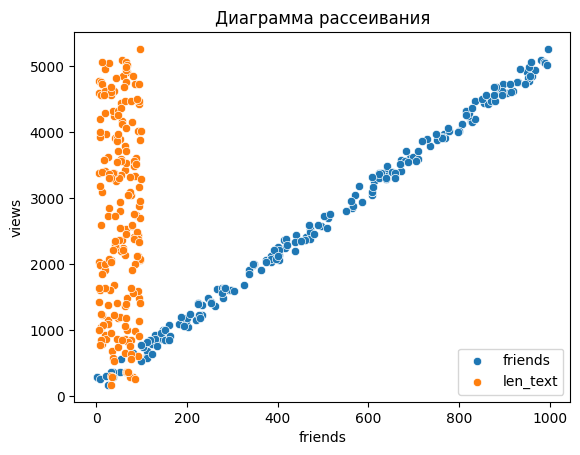

In [ ]:
#seaborn
x1 = Data['friends']
x2 = Data['len_text']
y = Data['views']

fig, ax = plt.subplots()
sns.scatterplot(x = x1, y = y, label = 'friends')
sns.scatterplot(x = x2, y = y, label = 'len_text')

plt.title('Диаграмма рассеивания')
plt.show();

In [ ]:
#plotly
x1 = Data['friends']
x2 = Data['len_text']
y = Data['views']

fig = px.scatter(x=[x1,x2], y=y, title='Диаграмма рассеивания')
fig.update_layout(showlegend=False)
fig.show()

## Гистограмма

**Гистограмма** - столбчатая диаграмма, один из видов графического изображения статистического распределения каких-либо величин по *количественному* признаку. Часто используется для визуализации *непрерывных* распределений.

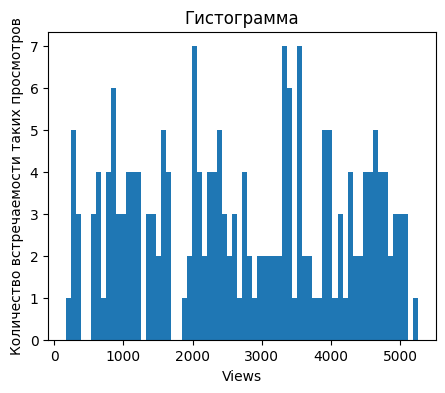

In [ ]:
#matplotlib
x = Data['views']

fig, ax = plt.subplots(figsize = (5,4))
plt.hist(x, bins = 70)

plt.xlabel("Views")
plt.ylabel("Количество встречаемости таких просмотров")
plt.title('Гистограмма')
plt.show();

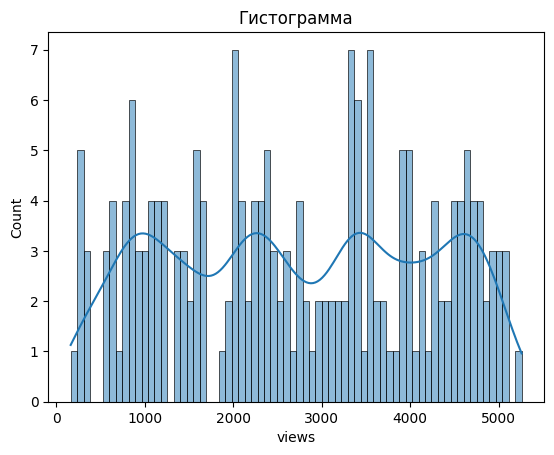

In [ ]:
#seaborn
x = Data['views']

fig, ax = plt.subplots()
sns.histplot(x = x, bins = 70, kde = True, kde_kws = {'bw_adjust': 0.5})

plt.title('Гистограмма')
plt.show();

In [ ]:
#plotly
x = Data['views']

fig = px.histogram(x=x, title='Гистограмма', nbins = 70)
fig.update_layout(xaxis_title="Views",
                  yaxis_title="Количество встречаемости таких просмотров")

fig.show()

## Столбчатая диаграмма

**Столбчатая диаграмма** - диаграмма, представленная прямоугольными зонами, высоты или длины которых пропорциональны величинам, которые они отображают. Столбчатые диаграммы лучше применять для визуализации категориальных переменных.

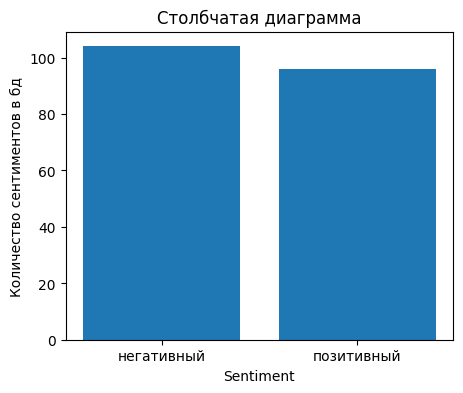

In [ ]:
#matplotlib
x = list(Data['sentiment'])

fig, ax = plt.subplots(figsize = (5,4))
plt.bar(x = ['негативный', 'позитивный'], height = [x.count(np.unique(x)[0]), x.count(np.unique(x)[1])])

plt.xlabel("Sentiment")
plt.ylabel("Количество сентиментов в бд")
plt.title('Столбчатая диаграмма')
plt.show();

## Круговая диаграмма

**Круговая диаграмма** - это способ представления данных. Такая диаграмма построена в виде круга, где каждый сектор - это категория данных

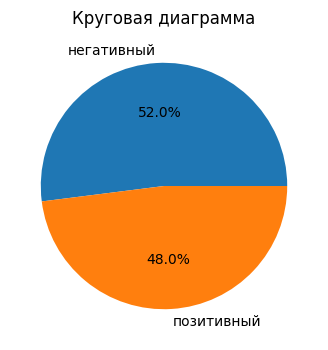

In [ ]:
#matplotlib
x = list(Data['sentiment'])

fig, ax = plt.subplots(figsize = (5,4))
ax.pie(labels = ['негативный', 'позитивный'], x = [x.count(np.unique(x)[0]), x.count(np.unique(x)[1])], autopct = '%1.1f%%')

plt.title('Круговая диаграмма')
plt.show();

## Библиотека Altair

https://habr.com/ru/companies/otus/articles/758380/

Altair - это библиотека Python **декларативной** статистической визуализации. Идеально подходит для графиков, требующих большого количества статистических преобразований.

#Визуализация текстов

## Облако слов

Облако слов - метод визуализации данных, используемый для предоставления текстовых данных, в котором размер каждого слова указывает на его частоту

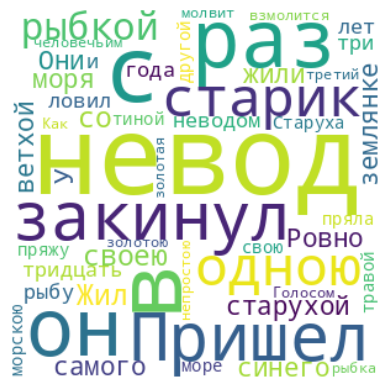

In [ ]:
#matplotlib
from wordcloud import WordCloud
text = "Жил старик со своею старухой У самого синего моря; Они жили в ветхой землянке Ровно тридцать лет и три года. Старик ловил неводом рыбу Старуха пряла свою пряжу. Раз он в море закинул невод, — Пришел невод с одною тиной. Он в другой раз закинул невод, — Пришел невод с травой морскою. В третий раз закинул он невод, — Пришел невод с одною рыбкой, С непростою рыбкой, — золотою. Как взмолится золотая рыбка! Голосом молвит человечьим:"

wc = WordCloud(width=300, height=300, background_color="white")
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

##Визуализация биграмм

In [ ]:
!pip install pymorphy3 > None
import nltk
from nltk.tokenize import word_tokenize
import pymorphy3
from string import punctuation
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
#функция предобработки текстов
morph = pymorphy3.MorphAnalyzer()
punktuations = list(punctuation)
punktuations.append('—')
def preproc (text):
  token = word_tokenize(text.lower())
  words_without_punkt = [i for i in token if (i not in punktuations)]
  lem = [morph.parse(i)[0].normal_form for i in words_without_punkt]
  return lem

In [ ]:
text = "Жил старик со своею старухой У самого синего моря; Они жили в ветхой землянке Ровно тридцать лет и три года. Старик ловил неводом рыбу Старуха пряла свою пряжу. Раз он в море закинул невод, — Пришел невод с одною тиной. Он в другой раз закинул невод, — Пришел невод с травой морскою. В третий раз закинул он невод, — Пришел невод с одною рыбкой, С непростою рыбкой, — золотою. Как взмолится золотая рыбка! Голосом молвит человечьим:"
#создаем список биграмм
pd.Series(nltk.ngrams(preproc(text), 2))

,0
0,"(жить, старик)"
1,"(старик, с)"
2,"(с, свой)"
3,"(свой, старуха)"
4,"(старуха, у)"
...,...
66,"(взмолиться, золотой)"
67,"(золотой, рыбка)"
68,"(рыбка, голос)"
69,"(голос, молвить)"


In [ ]:
#считаем количество биграмм
pd.Series(nltk.ngrams(preproc(text), 2)).value_counts()

,count
"(невод, прийти)",3
"(прийти, невод)",3
"(невод, с)",3
"(закинуть, невод)",2
"(он, в)",2
...,...
"(старуха, прясть)",1
"(прясть, свой)",1
"(свой, пряжа)",1
"(пряжа, раз)",1


<ipython-input-23-5fefeee2387f>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'TOP 10 bigram')

<Figure size 2000x1000 with 0 Axes>

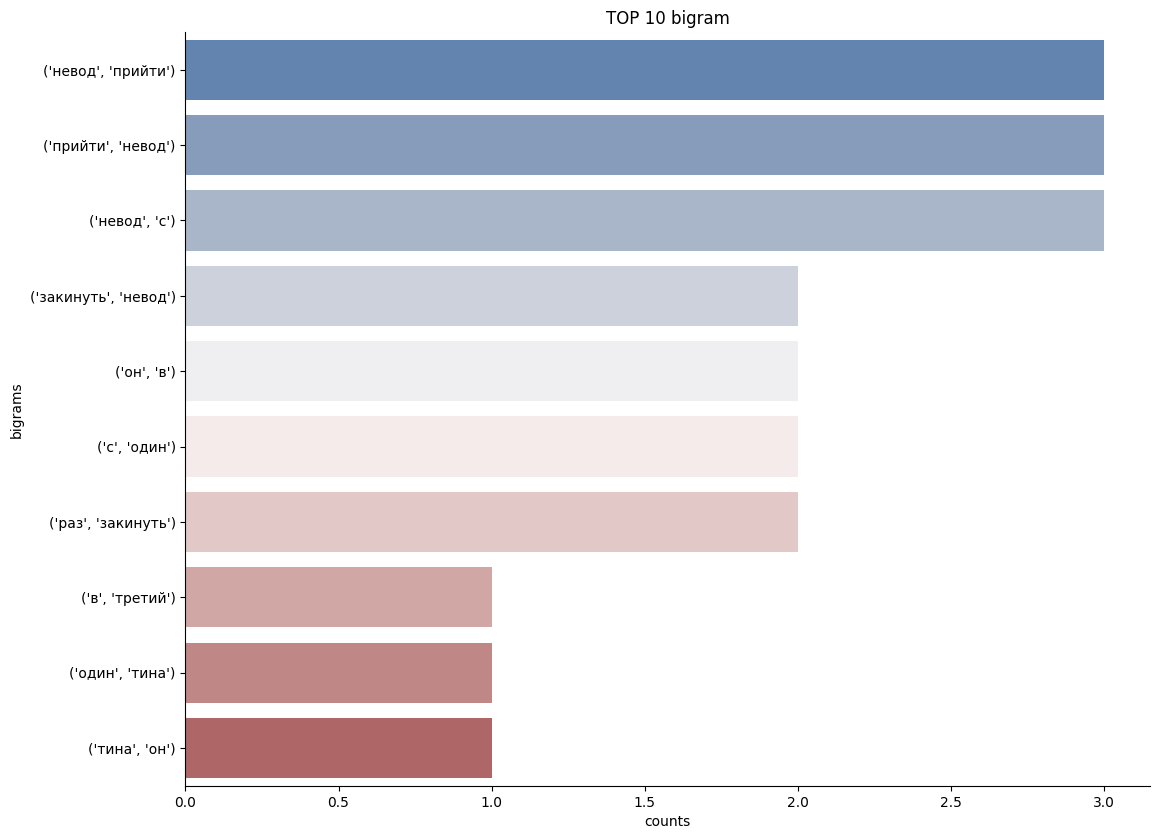

In [ ]:
# Визуализация биграмм
bigrams_series = (pd.Series(nltk.ngrams(preproc(text), 2)).value_counts())[:10]
bigrams_top = pd.DataFrame(bigrams_series.sort_values(ascending=False))
bigrams_top = bigrams_top.reset_index().rename(columns={'index': 'bigrams', 'count':'counts'})
bigrams_top['bigrams'] = bigrams_top['bigrams'].astype(str)
plt.figure(figsize=(20,10))
sns.catplot(x = 'counts' , y='bigrams', kind="bar", palette="vlag", data=bigrams_top, height=8.27, aspect=11.7/8.27)
plt.title('TOP 10 bigram')

##Тематическое моделирование

In [1]:
!pip install pyLDAvis > None

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.1 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
#принудительная перезагрузка среды выполнения. После перезагрузки нужно запускать только последующий код
import os
os.kill(os.getpid(), 9)

In [1]:
!pip install pymorphy3 > None

In [5]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
import pyLDAvis.lda_model
import pymorphy3
import nltk
from nltk.tokenize import word_tokenize
from string import punctuation
nltk.download('punkt')
nltk.download('punkt_tab')
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [6]:
#функция предобработки текстов
morph = pymorphy3.MorphAnalyzer()
punktuations = list(punctuation)
punktuations.append('—')
def preproc (text):
  token = word_tokenize(text.lower())
  words_without_punkt = [i for i in token if (i not in punktuations)]
  lem = [morph.parse(i)[0].normal_form for i in words_without_punkt]
  return lem

In [7]:
text_list = ['Как приготовить борщ по традиционному рецепту?',
             'Рецепт домашней пиццы с грибами и сыром моцарелла.',
             'Пошаговая инструкция приготовления классического оливье.',
             'Советы по выбору ингредиентов для идеального плова.',
             'Всё о выпечке домашнего хлеба на закваске.',
             'Куда поехать отдыхать летом недорого?',
             'Что посмотреть в Крыму за неделю?',
             'Маршрут выходного дня по Золотому кольцу России.',
             'Какие достопримечательности посетить в Турции?',
             'Полезные советы туристам перед поездкой в Таиланд.',
             'Эффективные упражнения для укрепления мышц спины.',
             'Программа тренировок для быстрого похудения дома.',
             'Правильное питание спортсменов и любителей спорта.',
             'Как выбрать кроссовки для бега новичкам?',
             'Польза регулярных прогулок пешком для здоровья сердца.']
text_preproc_list = [' '.join(preproc(t)) for t in text_list]
text_preproc_list

['как приготовить борщ по традиционный рецепт',
 'рецепт домашний пицца с гриб и сыр моцарелла',
 'пошаговый инструкция приготовление классический оливье',
 'совет по выбор ингредиент для идеальный плов',
 'всё о выпечка домашний хлеб на закваска',
 'куда поехать отдыхать лето недорого',
 'что посмотреть в крым за неделя',
 'маршрут выходной день по золотой кольцо россия',
 'какой достопримечательность посетить в турция',
 'полезный совет турист перед поездка в таиланд',
 'эффективный упражнение для укрепление мышца спина',
 'программа тренировка для быстрый похудение дом',
 'правильный питание спортсмен и любитель спорт',
 'как выбрать кроссовок для бег новичок',
 'польза регулярный прогулка пешком для здоровье сердце']

In [8]:
vectorizer = CountVectorizer()
lda_model = LatentDirichletAllocation(
    n_components=3, # Выбираем количество тем
    random_state=62,
    max_iter = 1000,
    doc_topic_prior=1, #0.1 до 1
    topic_word_prior=0.1) #0.01 до 0.1


data_matrix = vectorizer.fit_transform(text_preproc_list)
lda_output = lda_model.fit_transform(data_matrix)

In [9]:
lda_output

array([[0.66666823, 0.22221929, 0.11111247],
       [0.77777518, 0.11111261, 0.11111221],
       [0.74999641, 0.12500207, 0.12500151],
       [0.10000381, 0.59999825, 0.29999794],
       [0.22222634, 0.66666028, 0.11111338],
       [0.12500554, 0.12500397, 0.74999049],
       [0.12500405, 0.74999384, 0.12500211],
       [0.10000297, 0.79999548, 0.10000155],
       [0.14286333, 0.14286157, 0.7142751 ],
       [0.11111562, 0.11111434, 0.77777005],
       [0.1111154 , 0.11111418, 0.77777042],
       [0.1111154 , 0.11111418, 0.77777042],
       [0.12500405, 0.74999384, 0.12500211],
       [0.22222894, 0.11111457, 0.66665649],
       [0.100004  , 0.10000286, 0.79999314]])

In [10]:
# Вывод тем и связанных с ними слов
for topic_idx, topic_words in enumerate(lda_model.components_):
    top_words_idx = topic_words.argsort()[-10:][::-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    print(f"Тема {topic_idx + 1}: {', '.join(top_words)}")

Тема 1: рецепт, как, домашний, моцарелла, пицца, гриб, сыр, пошаговый, приготовление, классический
Тема 2: по, золотой, день, маршрут, кольцо, россия, выходной, что, крым, посмотреть
Тема 3: для, совет, сердце, пешком, прогулка, здоровье, регулярный, польза, быстрый, похудение


In [11]:
pyLDAvis.enable_notebook()
pyLDAvis.lda_model.prepare(lda_model, data_matrix, vectorizer, mds='tsne')

PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
2      66.713669 -176.909988       1        1  42.392946
1      48.291321  -94.780106       2        1  32.744928
0     -13.419118 -151.636505       3        1  24.862126, topic_info=        Term      Freq     Total Category  logprob  loglift
10       для  4.000000  4.000000  Default  30.0000  30.0000
44        по  2.000000  2.000000  Default  29.0000  29.0000
59    рецепт  1.000000  1.000000  Default  28.0000  28.0000
21       как  1.000000  1.000000  Default  27.0000  27.0000
12  домашний  1.000000  1.000000  Default  26.0000  26.0000
..       ...       ...       ...      ...      ...      ...
6    выпечка  0.084177  1.037681   Topic3  -5.5489  -1.1200
15  закваска  0.084177  1.037681   Topic3  -5.5489  -1.1200
33        на  0.084177  1.037681   Topic3  -5.5489  -1.1200
74      хлеб  0.084177  1.037681   Topic3  -5.5489  -1.1200
62     совет  0.084171  1.754366   Topic3  -5.5490  -1.6452

[131 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
0         1  1.002978          бег
1         3  0.924799         борщ
2         1  1.002979      быстрый
3         2  0.963688          всё
4         2  0.963688        выбор
...     ...       ...          ...
72        1  1.002979   укрепление
73        1  1.002979   упражнение
74        2  0.963688         хлеб
75        2  0.963688          что
76        1  1.002979  эффективный

[77 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

# Лабораторная работа 3

Построить min 3 любых графика, анализирующих выбранный корпус данных

Можно рассмотреть такие варианты:
1. Зависимость кол-ва публикаций\лайков\просмотров и тп от времени публикации поста
2. Отследить динамику активности сообщества - зависимость между датой и кол-вом публикаций
3. Разделить ваши посты по темам (подобрать кол-во тем эмперическим путем). Посмотрет кол-во текстов в каждой теме. Отследить зависиомсть между лайками и темами (текстами в теме)
4. Гистограмма процентного соотношения между кол-вом просмотров и лайков\репостов